Importing the libraries


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [53]:
data = pd.read_csv('/content/drive/MyDrive/Cohort Hudson/Module 4- Machine Learning/Ensemble_methods/Copy of creditcard.csv')

In [54]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [55]:
data.shape

(56962, 30)

In [56]:
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

Highly Imbalance data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


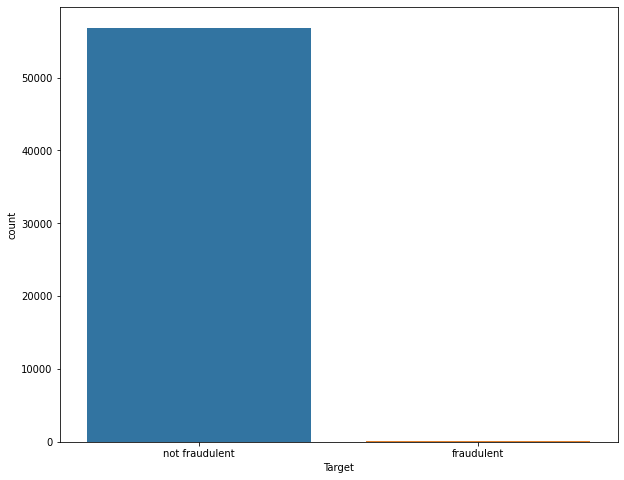

In [57]:
plt.figure(figsize = (10,8))
g = sns.countplot(data['Target'])
g.set_xticklabels(['not fraudulent', 'fraudulent'])
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [61]:
print('distribution in train set')
print(y_train.value_counts())
print('distribution in validation set')
print(y_val.value_counts())

distribution in train set
0    45487
1       82
Name: Target, dtype: int64
distribution in validation set
0    11377
1       16
Name: Target, dtype: int64


In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [63]:
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [65]:
print("Accuracy:", accuracy_score(y_pred,y_val))
print("Confusion Matrix:", confusion_matrix(y_pred,y_val))
print("Roc_auc_score:", roc_auc_score(y_pred, y_val))
#Despite the high accuracy, auc of roc is very low due to highly imbalance dataset

Accuracy: 0.9991222680593347
Confusion Matrix: [[11372     5]
 [    5    11]]
Roc_auc_score: 0.8435302584161027


use penalized algorithms

In [111]:
from sklearn.svm import SVC
svc = SVC(class_weight = 'balanced', probability =True)

In [ ]:
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)


In [68]:
print('ROC AUC:', roc_auc_score(y_pred_svc, y_val))
print('Accuracy:', accuracy_score(y_pred_svc, y_val))

Using XGB for prediction

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [70]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

In [71]:
print('ROC AUC:', roc_auc_score(y_pred_xgb, y_val))
print('Accuracy:', accuracy_score(y_pred_xgb, y_val))

ROC AUC: 0.8822210846363862
Accuracy: 0.9993855876415343


Resample the datasets

In [72]:
label_0 = data[data['Target'] == 0]
label_1 = data[data['Target'] == 1]

print(label_0.shape)
print(label_1.shape)

(56864, 30)
(98, 30)


In [73]:
#use SMOTE for resampling the datasets

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [75]:
x_smote, y_smote = smote.fit_resample(data.iloc[:, 0:-1], data['Target'])


In [76]:
print('original data:', len(data))
print('resampled data:', len(y_smote))

original data: 56962
resampled data: 113728


Using SMOTE and DNN

In [77]:
X_train, X_val, y_train, y_val = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

In [78]:
from tensorflow import keras

In [79]:
def DNN():
  model = keras.Sequential([
          keras.layers.Flatten(input_shape = [X_train.shape[-1]]),
          keras.layers.Dense(256, activation = 'relu'),
          keras.layers.Dense(128, activation = 'relu'),
          keras.layers.Dense(256, activation = 'relu'),
          keras.layers.Dense(128, activation = 'relu'),
          keras.layers.Dense(64, activation = 'relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(9, activation= 'softmax')
    ])
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [80]:
import tensorflow as tf
batch_size = 128
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)

model = DNN()
fit = model.fit(train_ds, validation_data = val_ds, epochs = 25)

Epoch 1/25
711/711 [==============================] - 9s 11ms/step - loss: 0.1772 - accuracy: 0.9597 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 2/25
711/711 [==============================] - 5s 7ms/step - loss: 0.0789 - accuracy: 0.9804 - val_loss: 0.0331 - val_accuracy: 0.9876
Epoch 3/25
711/711 [==============================] - 5s 7ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0388 - val_accuracy: 0.9850
Epoch 4/25
711/711 [==============================] - 5s 6ms/step - loss: 0.0378 - accuracy: 0.9907 - val_loss: 0.0219 - val_accuracy: 0.9929
Epoch 5/25
711/711 [==============================] - 5s 6ms/step - loss: 0.0358 - accuracy: 0.9911 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 6/25
711/711 [==============================] - 5s 6ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0107 - val_accuracy: 0.9959
Epoch 7/25
711/711 [==============================] - 5s 6ms/step - loss: 0.0201 - accuracy: 0.9945 - val_loss: 0.0130 - val_accuracy: 0.9944
Epoch

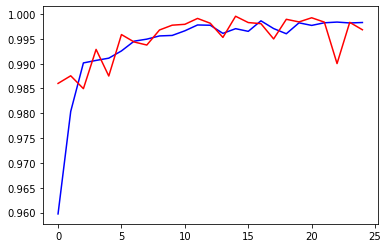

In [81]:
plt.plot(fit.history['accuracy'], color = 'blue')
plt.plot(fit.history['val_accuracy'], color = 'red')

In [107]:
predict_x_train = np.argmax(model.predict(X_train), axis = -1)
#y_pred_train_nn = np.argmax(predict_x_train,axis = 1)

In [108]:
predict_x_train.shape

(90982,)

In [105]:
y_train.shape

(90982,)

In [109]:
print('ROCAUC of train data : ', roc_auc_score(predict_x_train, y_train))
print('ACCURACY of train data:', accuracy_score(predict_x_train, y_train))

ROCAUC of train data :  0.9969498246149153
ACCURACY of train data: 0.9969224681805192


In [98]:
predict_x=model.predict(val_ds) 
y_pred_val_nn=np.argmax(predict_x,axis=1)

In [106]:
y_pred_val_nn.shape

(22746,)

In [110]:
print('ROCAUC of validation data: ', roc_auc_score(y_pred_val_nn, y_val))
print('ACCURACY of validation data: ', accuracy_score(y_pred_val_nn, y_val))

ROCAUC of validation data:  0.9968189449500751
ACCURACY of validation data:  0.996834608282775
